# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

638


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
citiesdf=pd.DataFrame({'City':cities})
citiesdf['Country']=""
citiesdf['Date']=""
citiesdf['Humidity']=""
citiesdf['Cloudiness']=""
citiesdf['Lat']=""
citiesdf['Lng']=""
citiesdf['Max Temp']=""
citiesdf['Wind Speed']=""

citiesdf.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,,,,,,,,
1,guerrero negro,,,,,,,,
2,sharkan,,,,,,,,
3,hithadhoo,,,,,,,,
4,kieta,,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

In [6]:
for index, row in citiesdf.iterrows():
    city = row['City']
    response = requests.get(query_url + city + '&units=imperial').json()
    try:
        citiesdf.loc[index, 'Country'] = response['sys']['country']
        citiesdf.loc[index, 'Date'] = response['dt']
        citiesdf.loc[index, 'Humidity'] = response['main']['humidity']
        citiesdf.loc[index, 'Cloudiness'] = response['clouds']['all']
        citiesdf.loc[index, 'Lat'] = response['coord']['lat']
        citiesdf.loc[index, 'Lng'] = response['coord']['lon']
        citiesdf.loc[index, 'Max Temp'] = response['main']['temp_max']
        citiesdf.loc[index, 'Wind Speed'] = response['wind']['speed']    
        print(f"Processing Record {index} of {len(cities)} for: {city}.")
    except (KeyError, IndexError):
        print('City not found, skipping')
        next
    print('===========================')


Processing Record 0 for: kaitangata.
Processing Record 1 for: guerrero negro.
Processing Record 2 for: sharkan.
Processing Record 3 for: hithadhoo.
Processing Record 4 for: kieta.
Processing Record 5 for: san cristobal.
Processing Record 6 for: bredasdorp.
Processing Record 7 for: hami.
Processing Record 8 for: hermanus.
Processing Record 9 for: hilo.
Processing Record 10 for: rawson.
data not found, skipping
Processing Record 12 for: butaritari.
Processing Record 13 for: ribeira grande.
Processing Record 14 for: general escobedo.
Processing Record 15 for: khash.
Processing Record 16 for: saskylakh.
Processing Record 17 for: khatanga.
Processing Record 18 for: monchegorsk.
Processing Record 19 for: rikitea.
Processing Record 20 for: kapaa.
Processing Record 21 for: harper.
Processing Record 22 for: aklavik.
Processing Record 23 for: mount gambier.
Processing Record 24 for: hobart.
Processing Record 25 for: vaini.
Processing Record 26 for: tasiilaq.
Processing Record 27 for: hasaki.
Pro

Processing Record 130 for: saldanha.
Processing Record 131 for: yellowknife.
Processing Record 132 for: matamoros.
Processing Record 133 for: lebu.
Processing Record 134 for: nanortalik.
Processing Record 135 for: faanui.
Processing Record 136 for: kruisfontein.
Processing Record 137 for: niihama.
Processing Record 138 for: katsuura.
Processing Record 139 for: lazaro cardenas.
Processing Record 140 for: puerto ayora.
Processing Record 141 for: maceio.
Processing Record 142 for: iranduba.
Processing Record 143 for: tiksi.
Processing Record 144 for: rio grande.
Processing Record 145 for: yangambi.
Processing Record 146 for: cabo san lucas.
Processing Record 147 for: georgetown.
Processing Record 148 for: waingapu.
data not found, skipping
Processing Record 150 for: mancheral.
Processing Record 151 for: jurado.
Processing Record 152 for: kaeo.
Processing Record 153 for: ulverstone.
Processing Record 154 for: vwawa.
Processing Record 155 for: airai.
Processing Record 156 for: moyale.
Proce

Processing Record 259 for: serebryansk.
Processing Record 260 for: tabou.
Processing Record 261 for: noumea.
Processing Record 262 for: tautira.
Processing Record 263 for: coari.
Processing Record 264 for: vardo.
Processing Record 265 for: saryagash.
data not found, skipping
Processing Record 267 for: marawi.
Processing Record 268 for: kokopo.
Processing Record 269 for: shieli.
Processing Record 270 for: port alberni.
Processing Record 271 for: tallahassee.
Processing Record 272 for: sylva.
data not found, skipping
Processing Record 274 for: druzhba.
Processing Record 275 for: okha.
Processing Record 276 for: upernavik.
Processing Record 277 for: pevek.
Processing Record 278 for: kaputa.
Processing Record 279 for: pemangkat.
Processing Record 280 for: kastamonu.
Processing Record 281 for: wanning.
Processing Record 282 for: korla.
Processing Record 283 for: dikson.
Processing Record 284 for: manakara.
Processing Record 285 for: bilma.
Processing Record 286 for: las cruces.
Processing R

Processing Record 387 for: berberati.
Processing Record 388 for: upata.
Processing Record 389 for: college.
Processing Record 390 for: fairhope.
Processing Record 391 for: vuktyl.
Processing Record 392 for: den helder.
Processing Record 393 for: briancon.
Processing Record 394 for: camacha.
Processing Record 395 for: tara.
data not found, skipping
Processing Record 397 for: narsaq.
Processing Record 398 for: chemnitz.
data not found, skipping
Processing Record 400 for: mackay.
Processing Record 401 for: tornio.
Processing Record 402 for: la ronge.
Processing Record 403 for: fairbanks.
data not found, skipping
Processing Record 405 for: mahajanga.
Processing Record 406 for: taltal.
Processing Record 407 for: ust-nera.
Processing Record 408 for: ustupo.
Processing Record 409 for: puerto escondido.
Processing Record 410 for: uvinza.
Processing Record 411 for: fayaoue.
Processing Record 412 for: san francisco.
Processing Record 413 for: baie-comeau.
Processing Record 414 for: half moon bay

Processing Record 514 for: makakilo city.
Processing Record 515 for: leua.
Processing Record 516 for: montlucon.
Processing Record 517 for: huejuquilla el alto.
Processing Record 518 for: ambon.
Processing Record 519 for: kahna nau.
Processing Record 520 for: juneau.
Processing Record 521 for: kwinana.
Processing Record 522 for: miranda.
Processing Record 523 for: selty.
Processing Record 524 for: maun.
Processing Record 525 for: sakaiminato.
Processing Record 526 for: zaliztsi.
Processing Record 527 for: beian.
Processing Record 528 for: xocali.
Processing Record 529 for: trelew.
Processing Record 530 for: bakal.
data not found, skipping
Processing Record 532 for: kashi.
Processing Record 533 for: nome.
Processing Record 534 for: gambiran.
Processing Record 535 for: vestmannaeyjar.
Processing Record 536 for: aleysk.
Processing Record 537 for: escanaba.
Processing Record 538 for: mubi.
data not found, skipping
Processing Record 540 for: bar harbor.
Processing Record 541 for: frankfort.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
citiesdf=citiesdf.replace(r'^\s*$', np.nan, regex=True)
citiesdf=citiesdf.dropna(how='any')
output_data_file = "../output_data/cities.csv"
citiesdf.to_csv(output_data_file, index=False)

In [10]:
citiesdf.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,NZ,1.579821e+09,83.0,99.0,-46.28,169.85,59.70,12.95
1,guerrero negro,MX,1.579821e+09,48.0,0.0,27.98,-114.06,69.21,11.30
2,sharkan,RU,1.579821e+09,91.0,65.0,57.30,53.87,19.99,1.01
3,hithadhoo,MV,1.579821e+09,78.0,14.0,-0.60,73.08,83.66,12.59
4,kieta,PG,1.579821e+09,70.0,43.0,-6.22,155.63,84.11,4.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

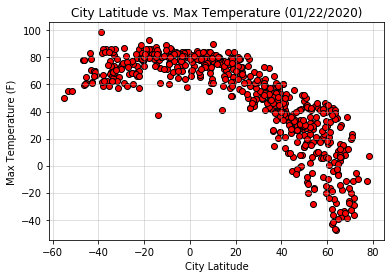

In [11]:
latitude=citiesdf['Lat']
max_temp=citiesdf['Max Temp']

plt.scatter(latitude, max_temp, facecolor='r', edgecolor='k')
plt.title('City Latitude vs. Max Temperature (01/22/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=0.5)

#### Latitude vs. Humidity Plot

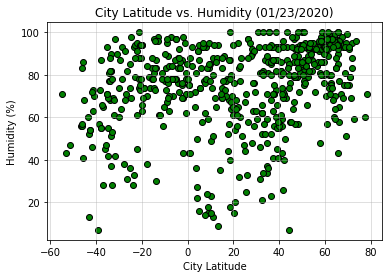

In [12]:
humidity=citiesdf['Humidity']

plt.scatter(latitude, humidity, facecolor='g', edgecolor='k')
plt.title('City Latitude vs. Humidity (01/23/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.5)

#### Latitude vs. Cloudiness Plot

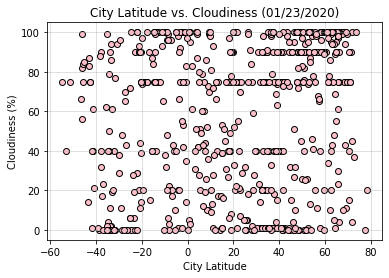

In [13]:
cloudiness=citiesdf['Cloudiness']

plt.scatter(latitude, cloudiness, facecolor='pink', edgecolor='k')
plt.title('City Latitude vs. Cloudiness (01/23/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=0.5)

#### Latitude vs. Wind Speed Plot

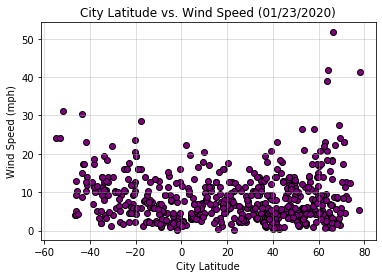

In [14]:
wind_speed=citiesdf['Wind Speed']

plt.scatter(latitude, wind_speed, facecolor='purple', edgecolor='k')
plt.title('City Latitude vs. Wind Speed (01/23/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(alpha=0.5)

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def lregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x=float(input('x-value for location of line equation'))
    y=float(input('y-value for location of line equation'))
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.title(input('Title of figure:'))
    plt.xlabel(input('X-label:'))
    plt.ylabel(input('Y-label:'))
    plt.grid()
    plt.show()
    print(f"R-value: {rvalue}, P-value: {pvalue}")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern=citiesdf[citiesdf['Lat'] > 0]
southern=citiesdf[citiesdf['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x-value for location of line equation5
y-value for location of line equation-20
Title of figure:Northern Hemisphere - Max Temp vs. Latitude
X-label:Latitude
Y-label:Max Temp (F)


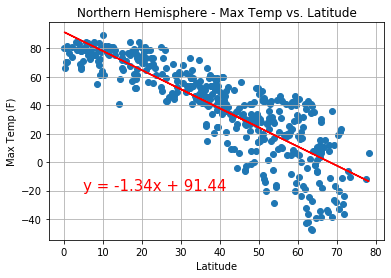

R-value: -0.8443298623226342, P-value: 1.2893277220551677e-112


In [17]:
nmax=northern['Max Temp']
nlat=northern['Lat']

lregress(nlat,nmax)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x-value for location of line equation-50
y-value for location of line equation45
Title of figure:Southern Hemisphere - Max Temp vs. Latitude
X-label:Latitude
Y-label:Max Temp (F)


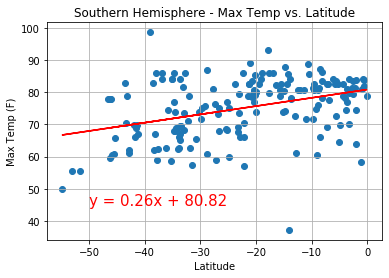

R-value: 0.3784392628440456, P-value: 1.904102605060576e-07


In [18]:
smax=southern['Max Temp']
slat=southern['Lat']

lregress(slat,smax)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x-value for location of line equation45
y-value for location of line equation25
Title of figure:Northern Hemisphere - Humidity (%) vs. Latitude
X-label:Latitude
Y-label:Humidity (%)


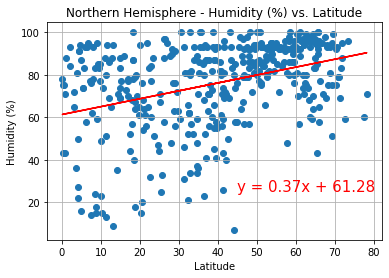

R-value: 0.3641948964816591, P-value: 2.6377052508094916e-14


In [19]:
nhumidity=northern['Humidity']

lregress(nlat,nhumidity)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x-value for location of line equation-50
y-value for location of line equation30
Title of figure:Southern Hemisphere - Humidity (%) vs. Latitude
X-label:Latitude
Y-label:Humidity (%)


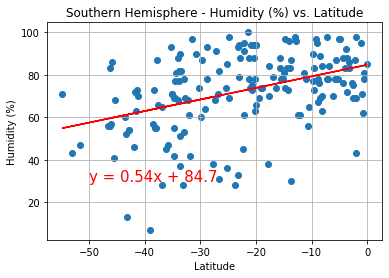

R-value: 0.405804926452433, P-value: 1.9133940825391764e-08


In [20]:
shumidity=southern['Humidity']

lregress(slat,shumidity)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x-value for location of line equation40
y-value for location of line equation30
Title of figure:Northern Hemisphere - Cloudiness (%) vs. Latitude
X-label:Latitude
Y-label:Cloudiness (%)


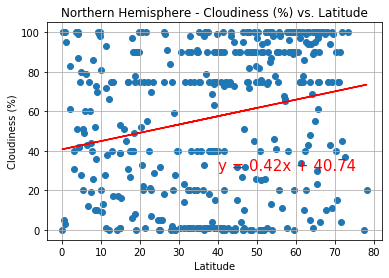

R-value: 0.22657382308683993, P-value: 3.583789960489393e-06


In [21]:
nclouds=northern['Cloudiness']

lregress(nlat,nclouds)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x-value for location of line equation-55
y-value for location of line equation20
Title of figure:Southern Hemisphere - Cloudiness (%) vs. Latitude
X-label:Latitude
Y-label:Cloudiness (%)


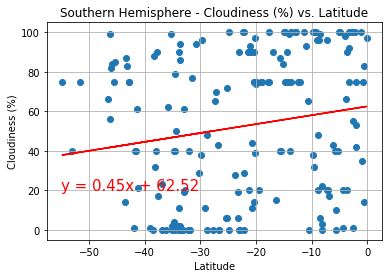

R-value: 0.16788917726455166, P-value: 0.025086737311393017


In [22]:
sclouds=southern['Cloudiness']

lregress(slat,sclouds)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x-value for location of line equation5
y-value for location of line equation30
Title of figure:Northern Hemisphere - Wind Speed (mph) vs. Latitude
X-label:Latitude
Y-label:Wind Speed (mph)


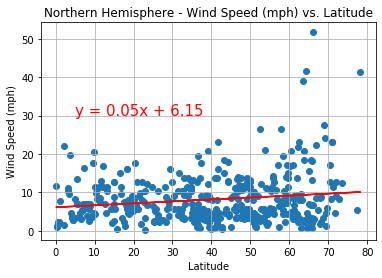

R-value: 0.15781658846185778, P-value: 0.001346413180804277


In [23]:
nwind=northern['Wind Speed']

lregress(nlat,nwind)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x-value for location of line equation-50
y-value for location of line equation25
Title of figure:Southern Hemisphere - Wind Speed (mph) vs. Latitude
X-label:Latitude
Y-label:Wind Speed (mph)


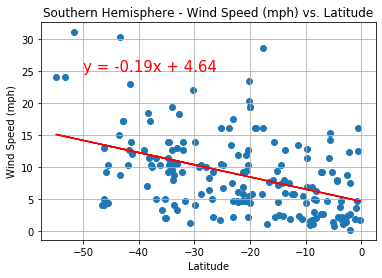

R-value: -0.428190357885753, P-value: 2.4886867816837925e-09


In [24]:
swind=southern['Wind Speed']

lregress(slat,swind)